In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

Data courtesy of Kaggle: https://www.kaggle.com/datasets/drahulsingh/best-selling-books

In [ ]:
#Load data

df = pd.read_csv(r"books")
df.head()

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga


In [ ]:
#value count for the various genres

df['Genre'].value_counts()

,count
Genre,
Fantasy,10
Novel,8
Self-help,7
Children's Literature,4
Historical fiction,4
...,...
"Dystopian, political fiction, social science fiction",1
Novella,1
Young adult historical novel,1


In [ ]:
#See if there are any missing values

df.isnull().sum()

,0
Book,0
Author(s),0
Original language,0
First published,0
Approximate sales in millions,0
Genre,56


In [ ]:
df.describe()

,First published,Approximate sales in millions
count,174.000000,174.000000
mean,1962.522989,30.097126
std,64.268737,27.957985
min,1304.000000,10.000000
25%,1947.000000,14.000000
50%,1974.000000,20.000000
75%,1995.000000,36.300000
max,2018.000000,200.000000


The mean for sales in 30 million, with a min of 10 and a max of 200 million

In [ ]:
#Additional way to view quantiles

df['Approximate sales in millions'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

,Approximate sales in millions
0.05,10.0
0.25,14.0
0.50,20.0
0.75,36.3
0.95,80.0


In [ ]:
df.shape

(174, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Book                           174 non-null    object 
 1   Author(s)                      174 non-null    object 
 2   Original language              174 non-null    object 
 3   First published                174 non-null    int64  
 4   Approximate sales in millions  174 non-null    float64
 5   Genre                          118 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.3+ KB


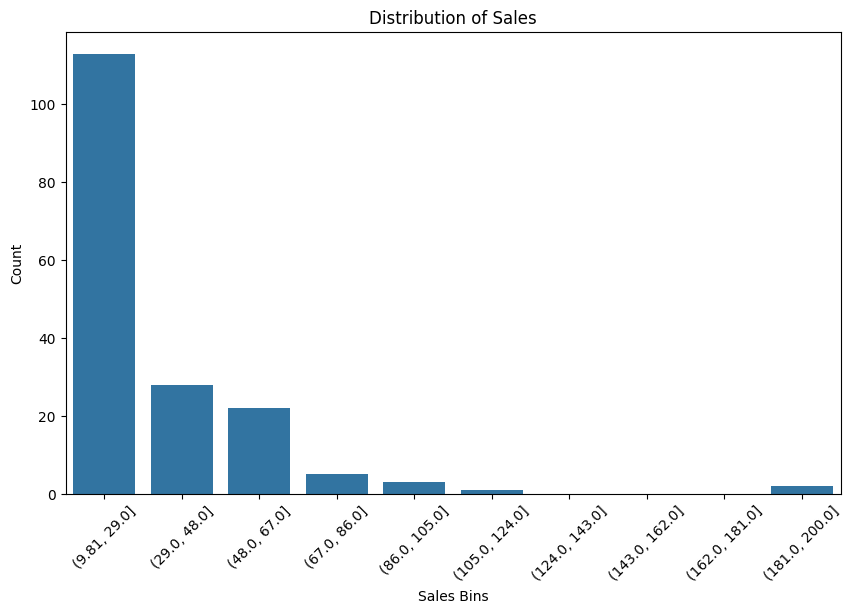

In [ ]:
#Binning for bestellers sales

binpop = pd.cut(df['Approximate sales in millions'], 10)
binpop.value_counts()

df['Sales Bins'] = binpop

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sales Bins')
plt.xlabel('Sales Bins')
plt.ylabel('Count')
plt.title('Distribution of Sales')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Percentages for each bin

bin_counts = df['Sales Bins'].value_counts()

total_rows = len(df)

bin_percentages = (bin_counts / total_rows) * 100

print(bin_percentages)

Sales Bins
(9.81, 29.0]      64.942529
(29.0, 48.0]      16.091954
(48.0, 67.0]      12.643678
(67.0, 86.0]       2.873563
(86.0, 105.0]      1.724138
(181.0, 200.0]     1.149425
(105.0, 124.0]     0.574713
(124.0, 143.0]     0.000000
(143.0, 162.0]     0.000000
(162.0, 181.0]     0.000000
Name: count, dtype: float64


In [ ]:
binpop.value_counts()

,count
Approximate sales in millions,
"(9.81, 29.0]",113
"(29.0, 48.0]",28
"(48.0, 67.0]",22
"(67.0, 86.0]",5
"(86.0, 105.0]",3
"(181.0, 200.0]",2
"(105.0, 124.0]",1
"(124.0, 143.0]",0
"(143.0, 162.0]",0


The vast majority of books (65%) are found in the first bin, between 9.81 and 29.0 million with a count of 113.

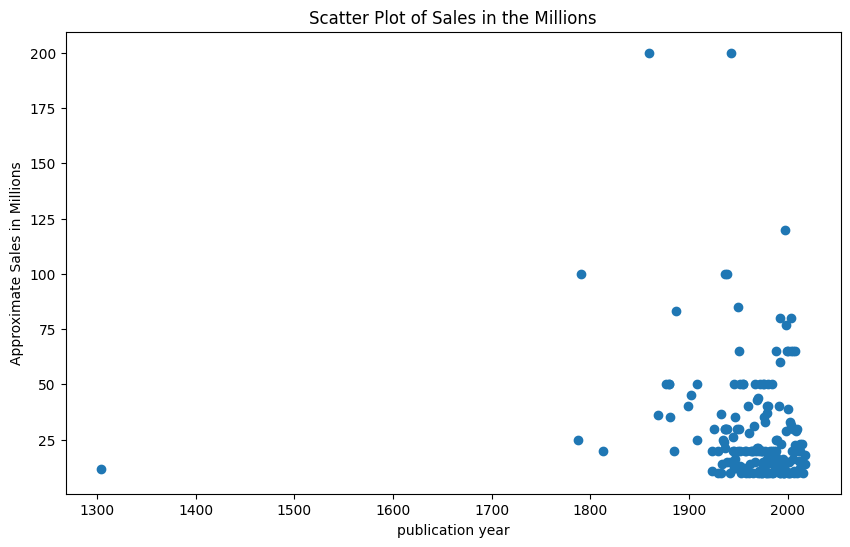

In [ ]:
#Scatter plot for sales

plt.figure(figsize=(10, 6))
plt.scatter(x=df['First published'], y=df['Approximate sales in millions'])


plt.xlabel('publication year')
plt.ylabel('Approximate Sales in Millions')
plt.title('Scatter Plot of Sales in the Millions')
plt.show()

The majority of bestsellers were published between 1900 and 2000, with 1300 being a dramatic outlier

In [ ]:
min(df['First published'])

1304

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32005 (\N{CJK UNIFIED IDEOGRAPH-7D05}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27155 (\N{CJK UNIFIED IDEOGRAPH-6A13}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22818 (\N{CJK UNIFIED IDEOGRAPH-5922}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10

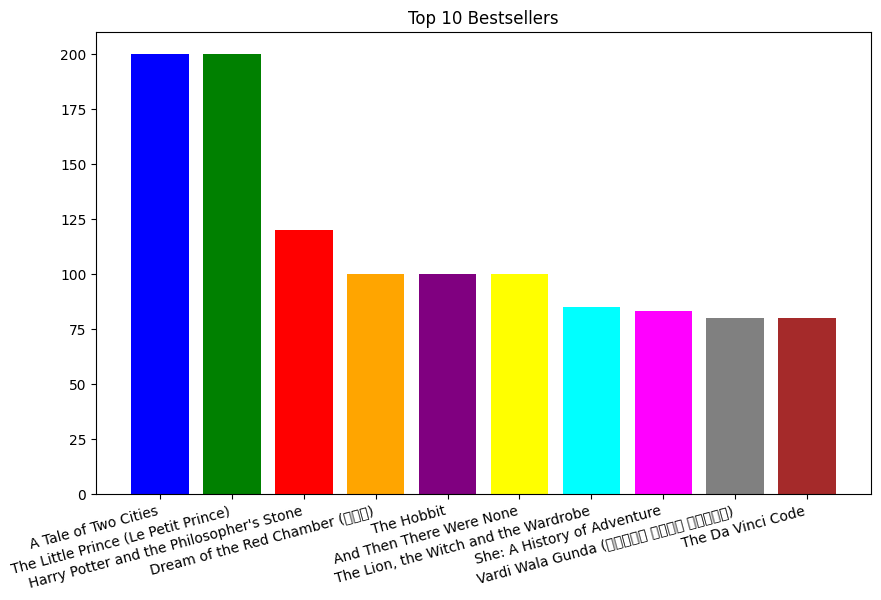

In [ ]:
# Determine top 10 books in terms of sales

titles = df.sort_values(by='Approximate sales in millions', ascending=False).head(10)


colors = ['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'gray', 'brown']

plt.figure(figsize=(10, 6))

for i, (book, sales) in enumerate(zip(titles['Book'], titles['Approximate sales in millions'])):
    plt.bar(book, sales, color=colors[i])

plt.xticks(rotation=15, ha='right')
plt.title('Top 10 Bestsellers')
plt.show();

In [ ]:
#Earliest bestseller

earliest_publishing_date = df['First published'].min()
earliest_book = df.loc[df['First published'] == earliest_publishing_date, 'Book'].iloc[0]
earliest_book

'The Divine Comedy (La Divina Commedia)'

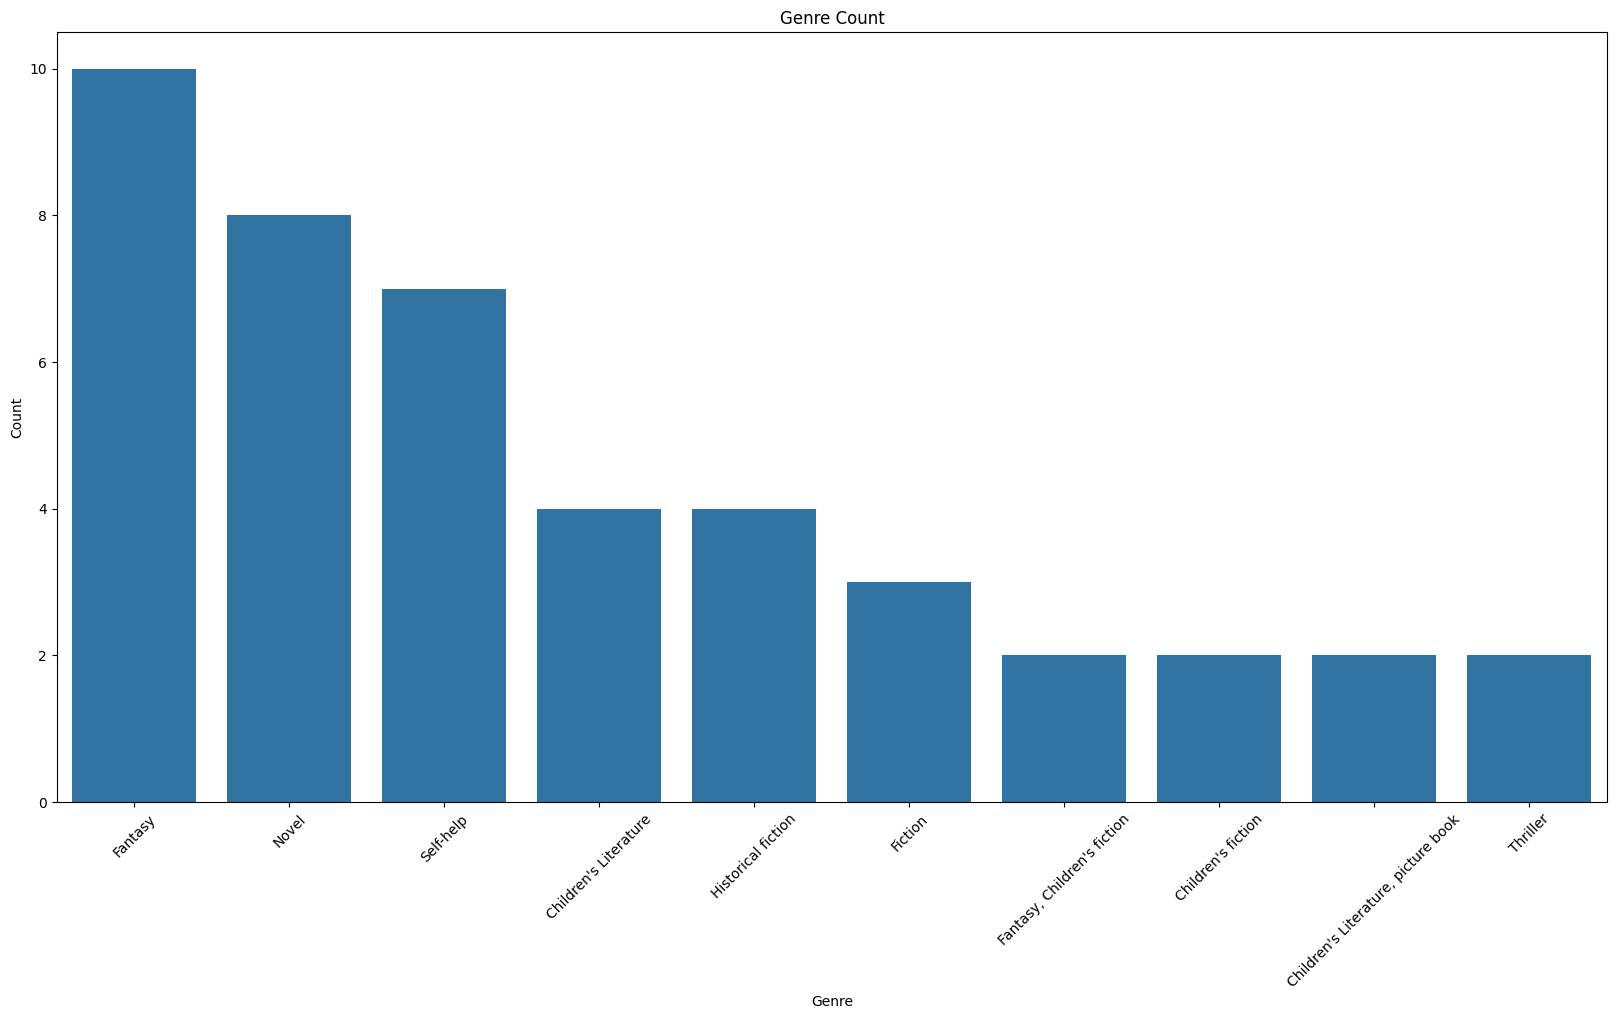

In [ ]:
#Genre Count

genre_count = df['Genre'].value_counts().head(10)

plt.figure(figsize=(20, 10))

sns.countplot(data=df, x='Genre', order=genre_count.index)
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Count')
plt.show()


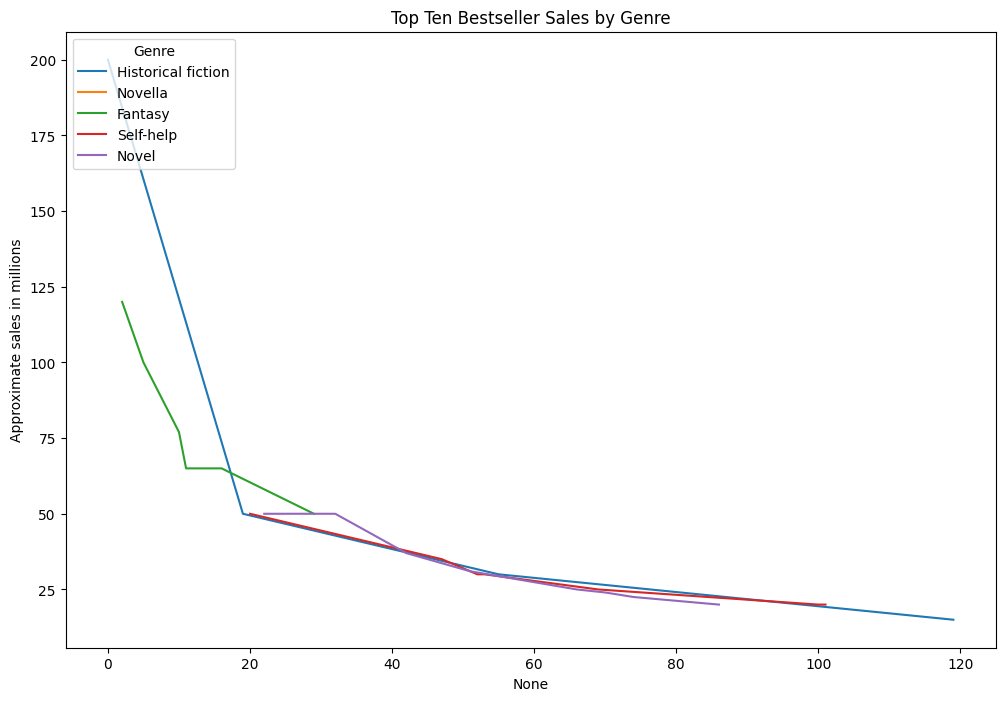

In [ ]:
# Aggregate sales by genre
sales_by_genre = df.groupby('Genre')['Approximate sales in millions'].sum().sort_values(ascending=False)

# Select top ten genres
top_three_genres = sales_by_genre.head(5).index.tolist()

# Filter DataFrame for top ten genres
top_genres_df = df[df['Genre'].isin(top_three_genres)]

plt.figure(figsize=(12, 8))
sns.lineplot(data=top_genres_df, x=top_genres_df.index, y='Approximate sales in millions', hue='Genre')
plt.title('Top Ten Bestseller Sales by Genre')
plt.legend(title='Genre', loc='upper left')
plt.show()

Clearly the most popular genre is the Novel, followed by Children's Literature, Self-Help, and Fantasy

In [ ]:
#Determine the mean sales for each genre

df.groupby('Genre')['Approximate sales in millions'].mean()

,Approximate sales in millions
Genre,
Adventure,83.0
Autobiographical novel,18.0
Autobiography,20.0
"Bildungsroman, Historical fiction",31.5
Biographical novel,25.0
...,...
"Young Adult novel, adventure, war, science fiction, action thriller",20.0
Young adult fiction,29.0
Young adult historical novel,26.0


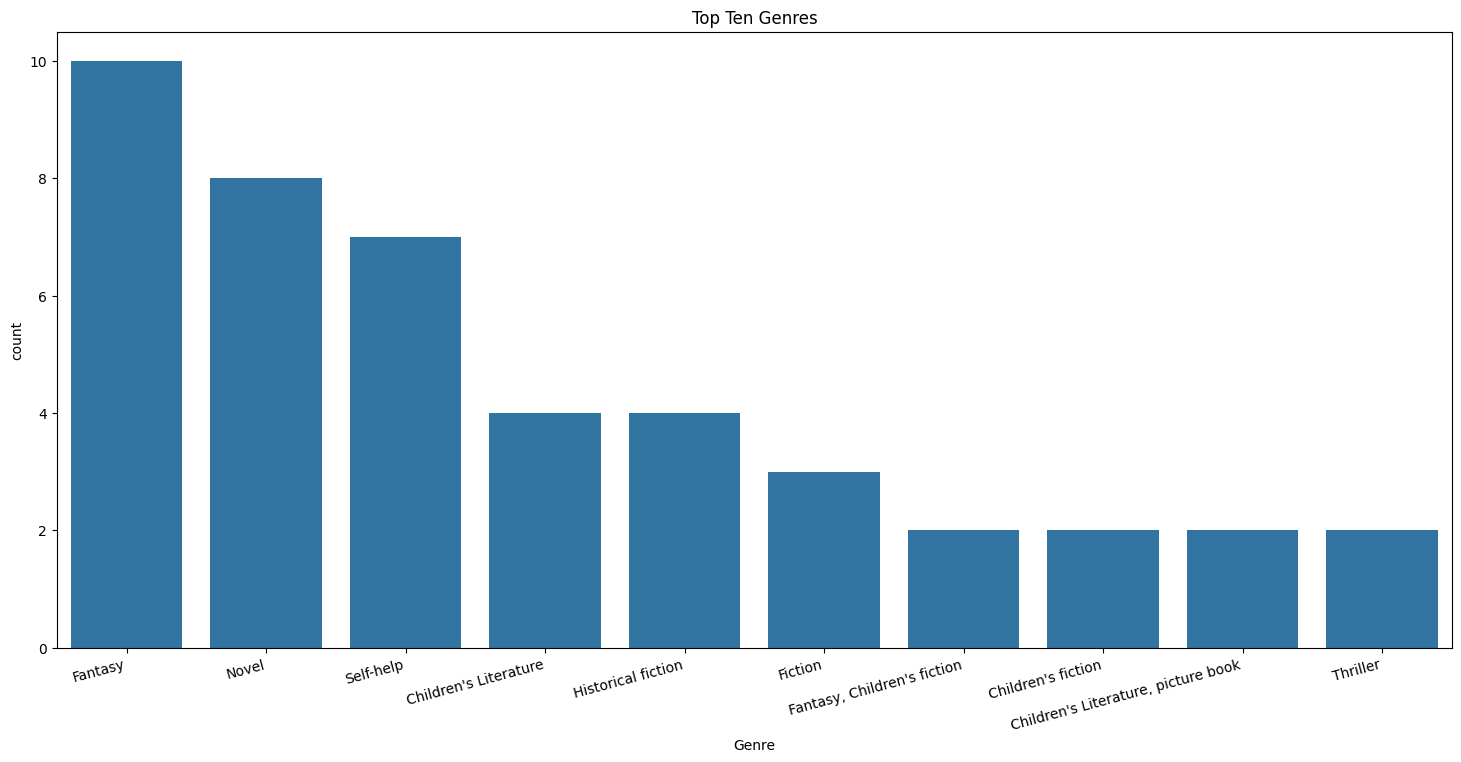

In [ ]:
#Determine the top 10 genres

top_genres = df['Genre'].value_counts().head(10)
top_genres = top_genres.sort_values(ascending=False)

plt.figure(figsize=(18, 8))
sns.countplot(data=df[df['Genre'].isin(top_genres.index)], x='Genre', order=top_genres.index)
plt.xticks(rotation=15, ha='right')


plt.title('Top Ten Genres')
plt.show()
plt.show()

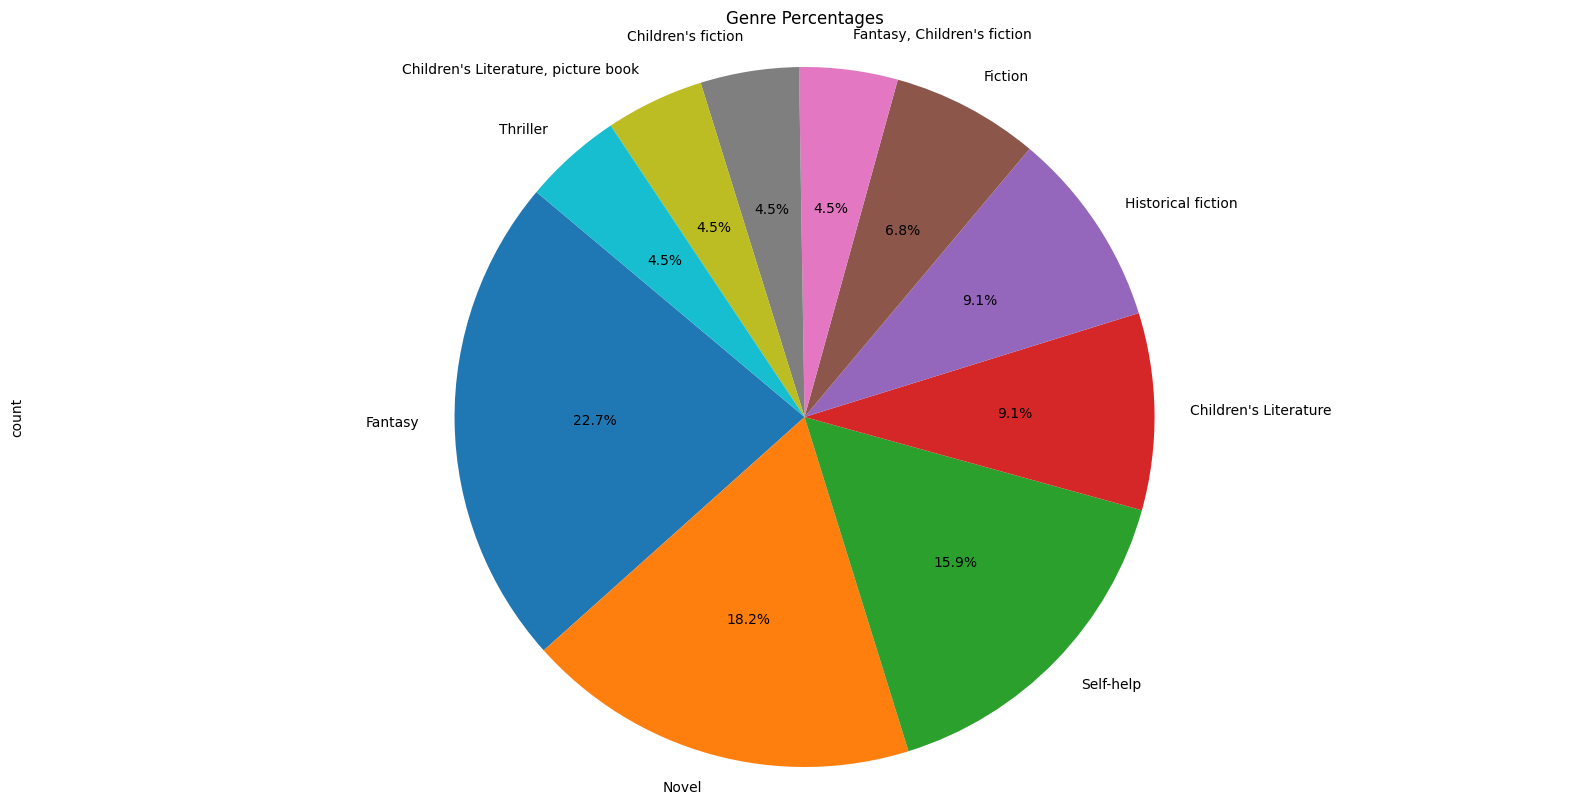

In [ ]:
top_genre = df['Genre'].value_counts().head(10)
top_genre = top_genre.sort_values(ascending=False)

plt.figure(figsize=(20, 10))
top_genre.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.axis('equal')

plt.title('Genre Percentages')
plt.show()
plt.show()

In [ ]:
#Determine titles for the Fantasy genre

df[df['Genre'] == 'Fantasy']['Book']

,Book
2,Harry Potter and the Philosopher's Stone
5,The Hobbit
10,Harry Potter and the Chamber of Secrets
11,Harry Potter and the Prisoner of Azkaban
12,Harry Potter and the Goblet of Fire
13,Harry Potter and the Order of the Phoenix
14,Harry Potter and the Half-Blood Prince
15,Harry Potter and the Deathly Hallows
16,The Alchemist (O Alquimista)
29,Watership Down


In [ ]:
#dDtermine titles for the novel genre

df[df['Genre'] == 'Novel']['Book']

,Book
22,Lolita
32,The Ginger Man
42,Kane and Abel
51,Valley of the Dolls
66,Paul et Virginie
70,Virgin Soil Upturned (Поднятая целина)
74,The Shack
86,Things Fall Apart


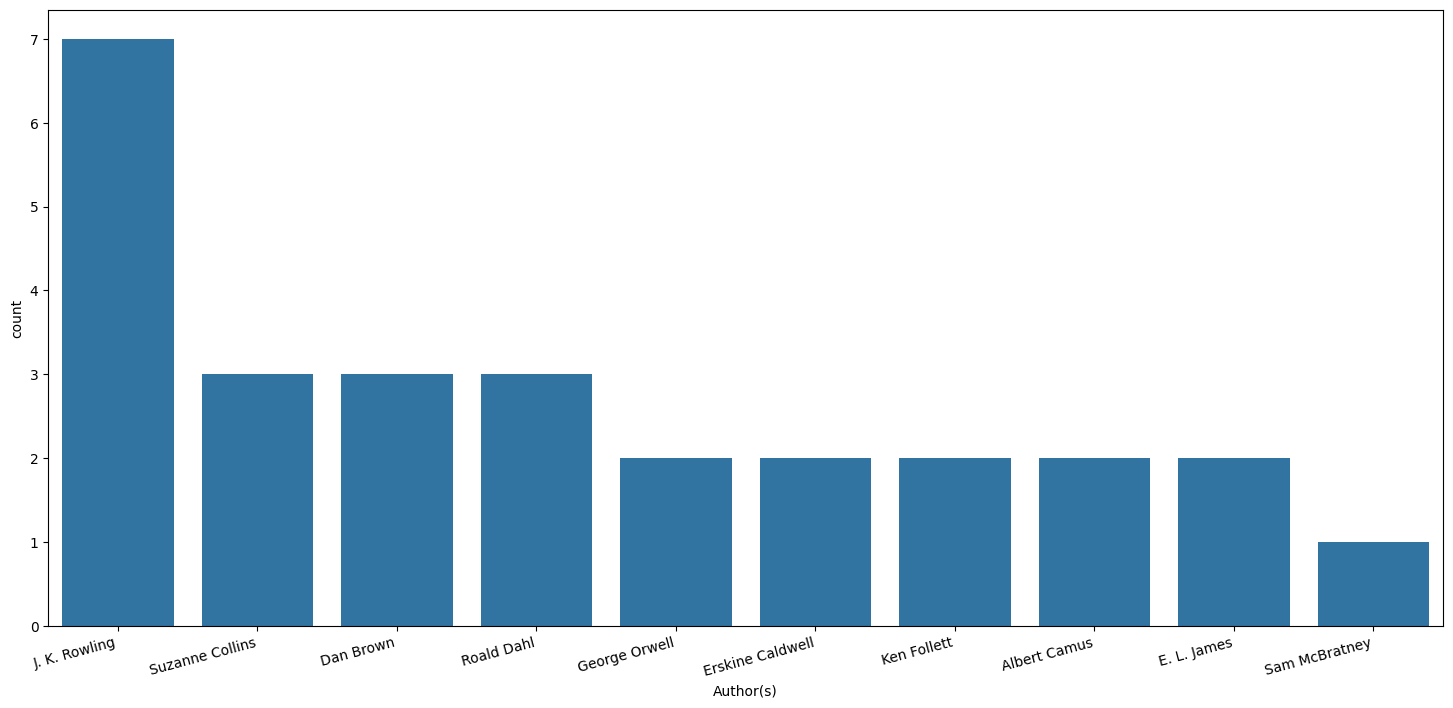

In [ ]:
#Determine authors with the most books on the best seller list

top_authors = df['Author(s)'].value_counts().head(10)
top_authors = top_authors.sort_values(ascending=False)

plt.figure(figsize=(18, 8))
sns.countplot(data=df[df['Author(s)'].isin(top_authors.index)], x='Author(s)', order=top_authors.index)
plt.xticks(rotation=15, ha='right')
plt.show()

In [ ]:
#Determine titels for J.K. Rowling's books

df[df['Author(s)'] == 'J. K. Rowling']['Book']

,Book
2,Harry Potter and the Philosopher's Stone
10,Harry Potter and the Chamber of Secrets
11,Harry Potter and the Prisoner of Azkaban
12,Harry Potter and the Goblet of Fire
13,Harry Potter and the Order of the Phoenix
14,Harry Potter and the Half-Blood Prince
15,Harry Potter and the Deathly Hallows


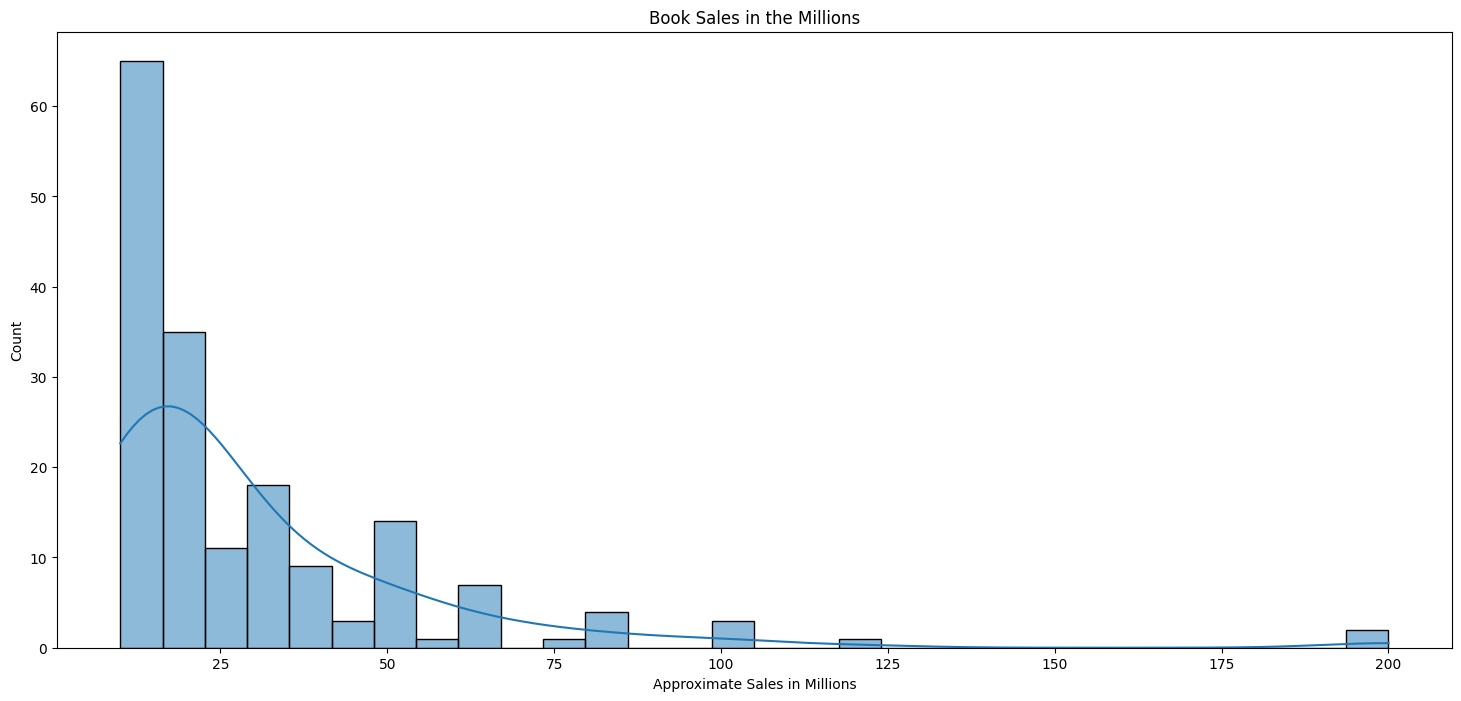

In [ ]:
#Plot the sales in millions

plt.figure(figsize=(18, 8))
sns.histplot(data=df, x='Approximate sales in millions', bins=30, kde=True)

plt.xlabel('Approximate Sales in Millions')
plt.title('Book Sales in the Millions')
plt.show()
plt.show()

In [ ]:
df['Approximate sales in millions'].mean()

30.097126436781608

Clearly, there are a number of outliers around 200 million. To isolate these further, let's use a boxplot

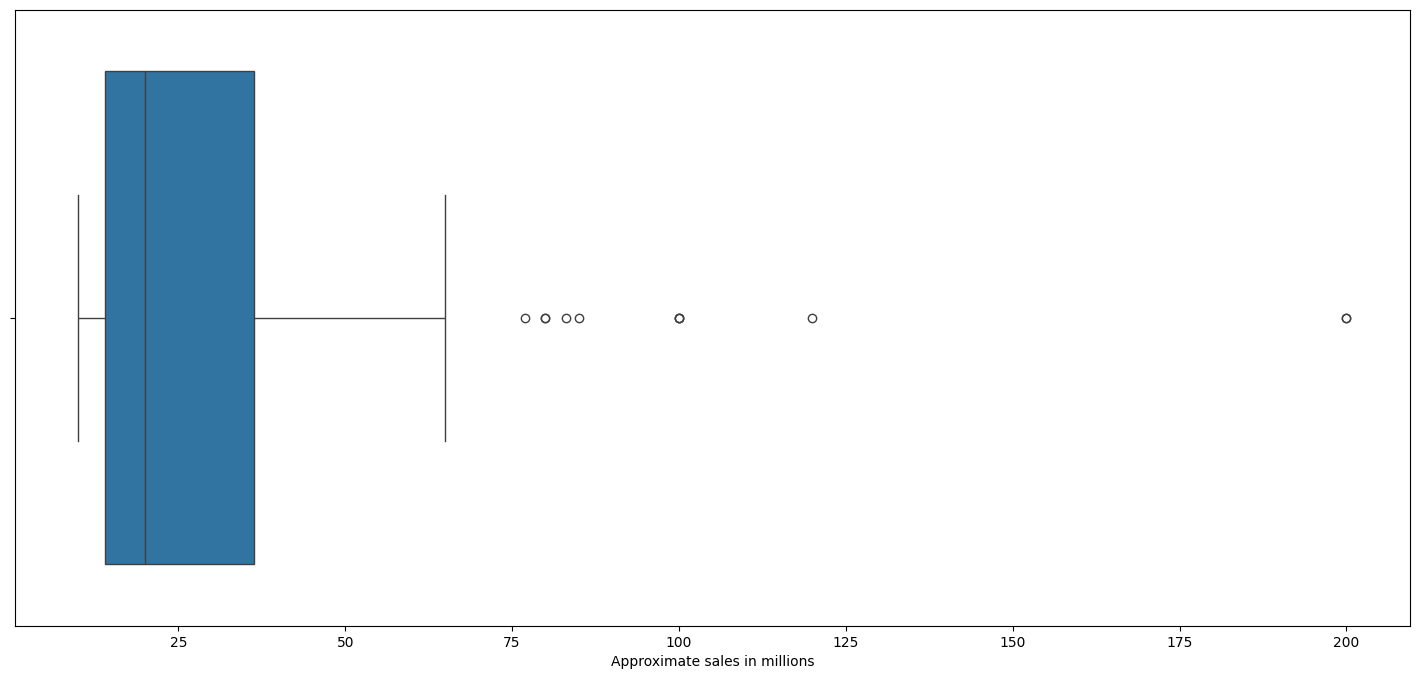

In [ ]:
plt.figure(figsize=(18, 8))
sns.boxplot(data=df, x="Approximate sales in millions");

In [ ]:
#Determine outliers

df[df['Approximate sales in millions'] >= 75.0]

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre,Sales Bins
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction,"(181.0, 200.0]"
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella,"(181.0, 200.0]"
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy,"(105.0, 124.0]"
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery,"(86.0, 105.0]"
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga,"(86.0, 105.0]"
5,The Hobbit,J. R. R. Tolkien,English,1937,100.0,Fantasy,"(86.0, 105.0]"
6,"The Lion, the Witch and the Wardrobe",C. S. Lewis,English,1950,85.0,"Fantasy, Children's fiction","(67.0, 86.0]"
7,She: A History of Adventure,H. Rider Haggard,English,1887,83.0,Adventure,"(67.0, 86.0]"
8,Vardi Wala Gunda (वर्दी वाला गुंडा),Ved Prakash Sharma,Hindi,1992,80.0,Detective,"(67.0, 86.0]"
9,The Da Vinci Code,Dan Brown,English,2003,80.0,Mystery thriller,"(67.0, 86.0]"


In [ ]:
df[df['Approximate sales in millions'] >= 75.0]['Genre'].value_counts()

,count
Genre,
Fantasy,3
Historical fiction,1
Novella,1
Mystery,1
Family saga,1
"Fantasy, Children's fiction",1
Adventure,1
Detective,1
Mystery thriller,1


In the top ten, there are four Fantasy books represented. The rest are single entries, solodifying Fantasy as the best selling genre (outside of Unknown)

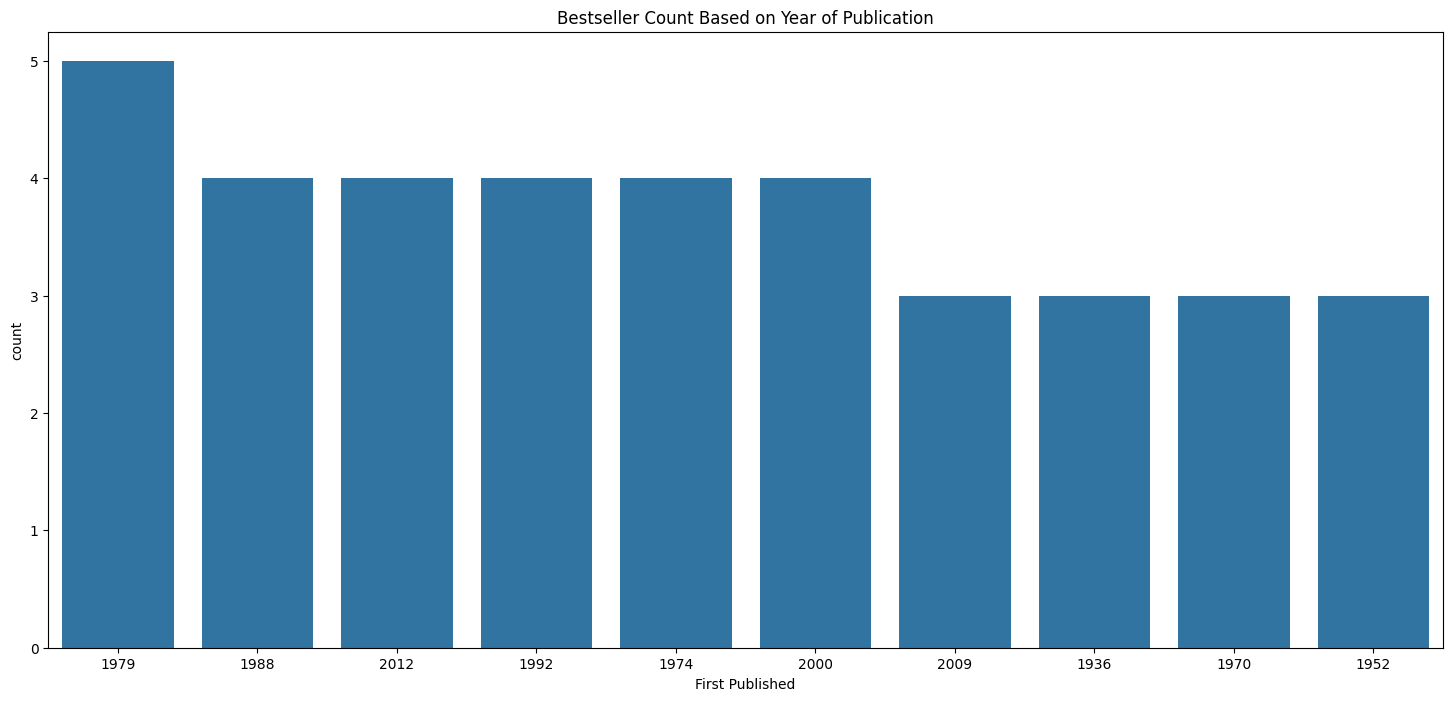

In [ ]:
#Determine the top 10 years with the most bestsellers

top_years = df['First published'].value_counts().head(10)
top_years = top_years.sort_values(ascending=False)

plt.figure(figsize=(18, 8))
sns.countplot(data=df[df['First published'].isin(top_years.index)], x='First published', order = top_years.index)
plt.xticks(rotation=0)

plt.xlabel('First Published')
plt.title('Bestseller Count Based on Year of Publication')
plt.show()

In [ ]:
#What are the bestseller titles in 1979?

df[df['First published'] == 1979]['Book']

,Book
38,Flowers in the Attic
42,Kane and Abel
112,The Neverending Story (Die unendliche Geschichte)
125,The Hitchhiker's Guide to the Galaxy
161,Problems in China's Socialist Economy (中国社会主义经...


In [ ]:
df[df['First published'] == 1979]['Genre']

,Genre
38,"Gothic horror, Family saga"
42,Novel
112,Children's Literature
125,Science fiction
161,NaN


In [ ]:
#What are the bestseller titles in 1988?

df[df['First published'] == 1988]['Book']

,Book
16,The Alchemist (O Alquimista)
65,A Brief History of Time
80,Kitchen (キッチン)
108,Matilda


In [ ]:
df[df['First published'] == 1988]['Genre']

,Genre
16,Fantasy
65,Popular science
80,Japanese novel
108,Children's Literature


In [ ]:
#Bestsellers from the 20th century

years_to_select = list(range(1900, 2000))
twenty_cen = df[df['First published'].isin(years_to_select)]['Genre'].value_counts().head(15)

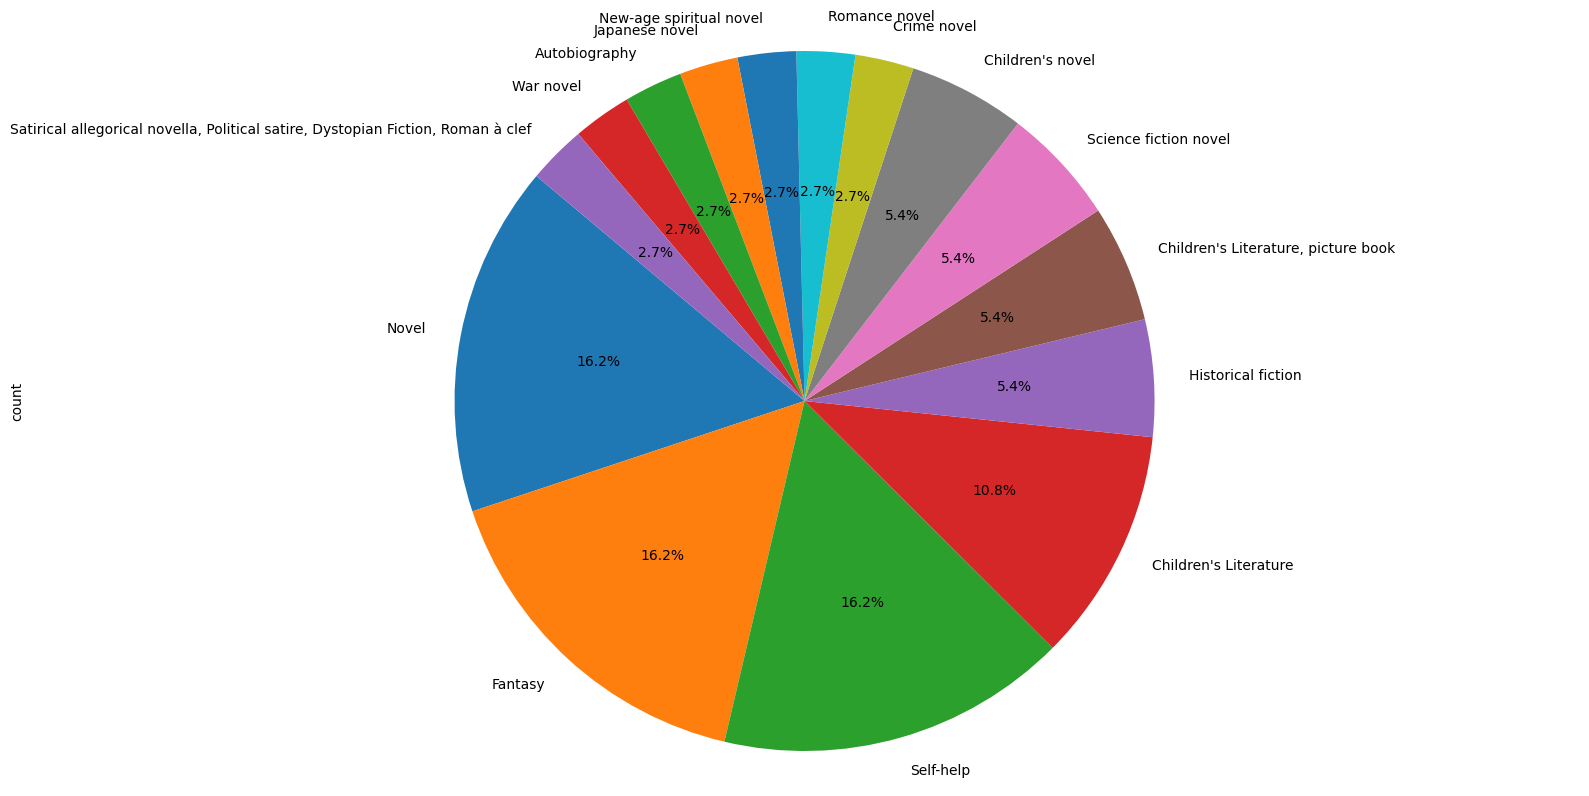

In [ ]:
plt.figure(figsize=(20, 10))
twenty_cen.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

In [ ]:
#Bestsellers from the 21st century

years_to_select = list(range(2000, 2018))
twenty_first = df[df['First published'].isin(years_to_select)]['Genre'].value_counts()

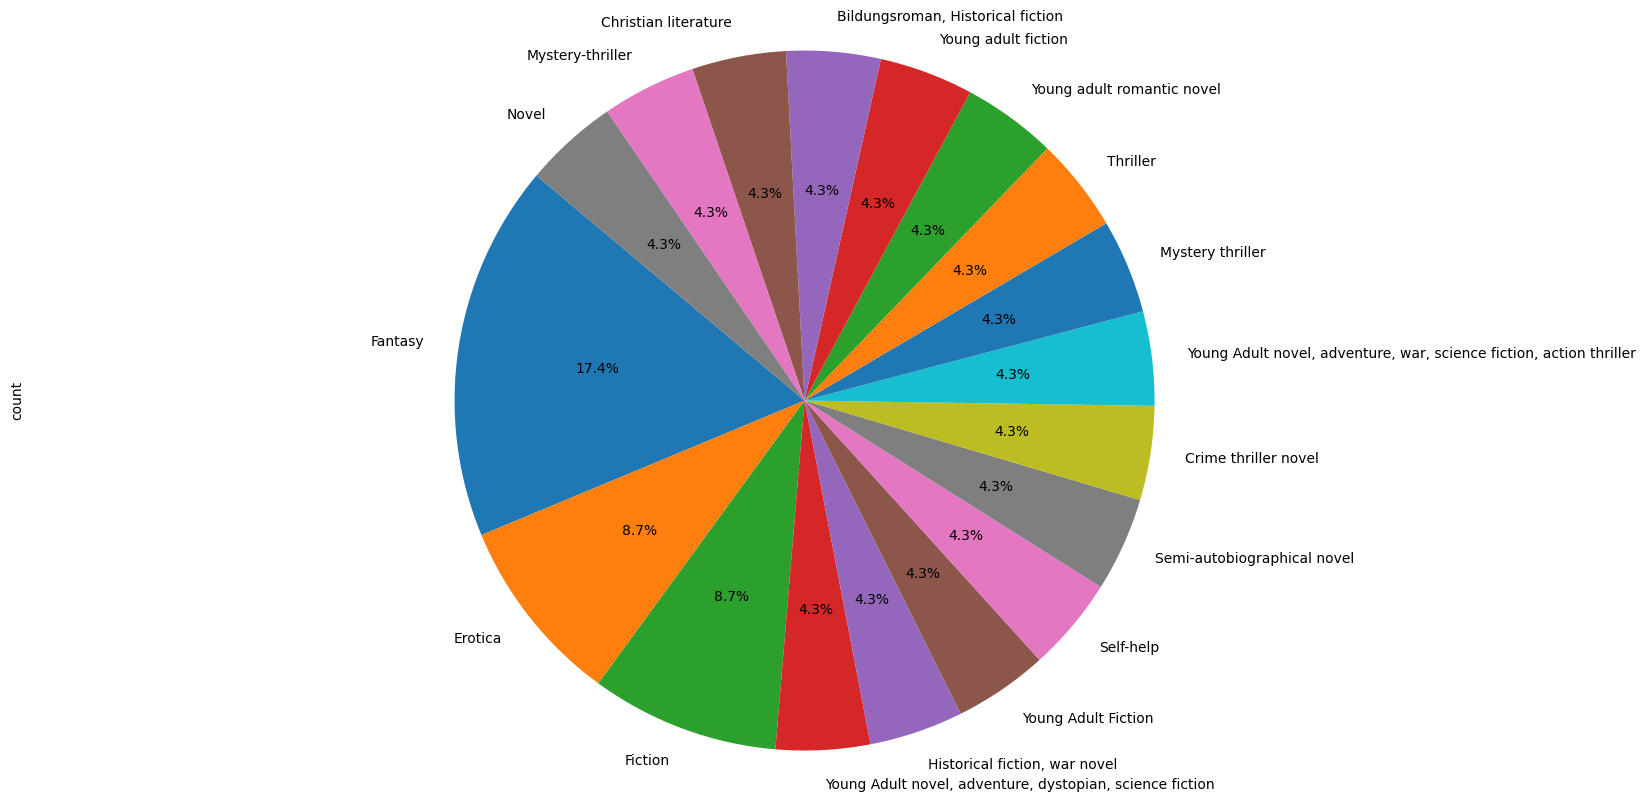

In [ ]:
#pie chart for the 21st_century

plt.figure(figsize=(20, 10))
twenty_first.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

The Novel has been the most popular genre from the 20th century on, with Young Adult fiction taking over Children's Literature as the second most lucrative genre.

In [ ]:
#Most popular genres in 1952?

df[df['First published'] == 1952]['Genre']

,Genre
31,Children's fiction
100,Self-help
131,NaN


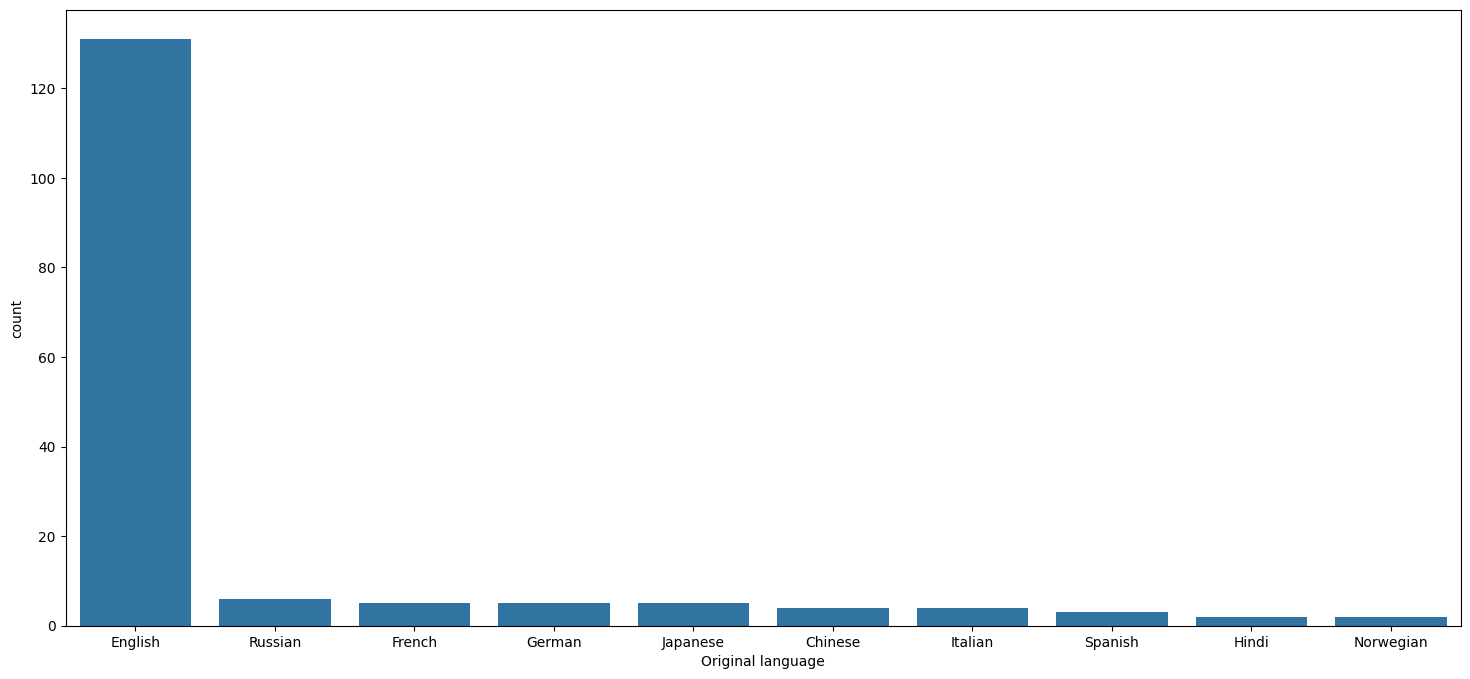

In [ ]:
#Top language

top_language = df['Original language'].value_counts().head(10)
top_language = top_language.sort_values(ascending=False)

plt.figure(figsize=(18, 8))
sns.countplot(data=df[df['Original language'].isin(top_language.index)], x='Original language', order = top_language.index)
plt.xticks(rotation=0)
plt.show()

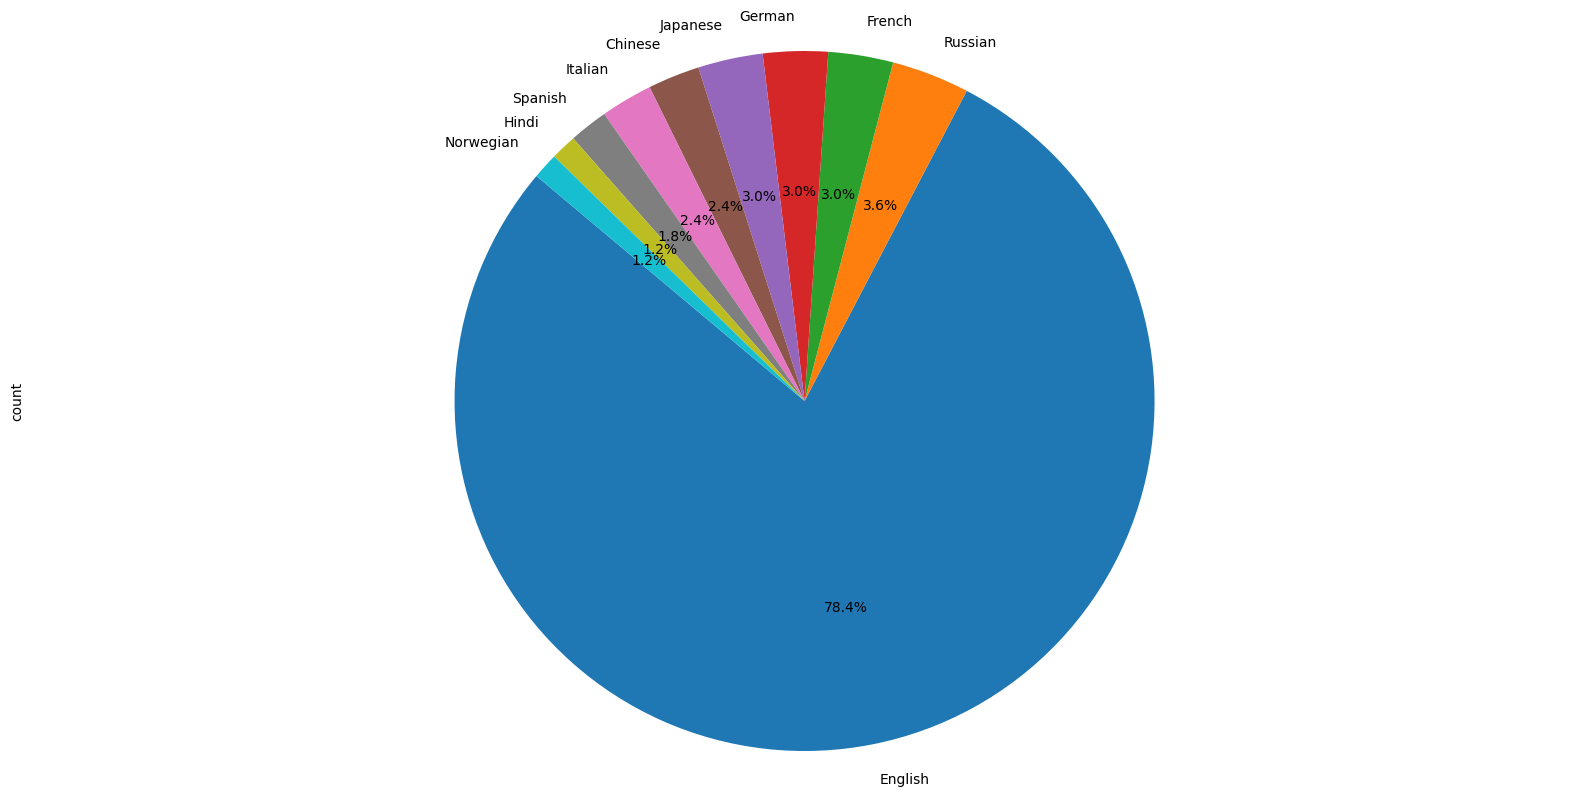

In [ ]:
plt.figure(figsize=(20, 10))
top_language.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

English language books are the vast majority with 78.4% of sales

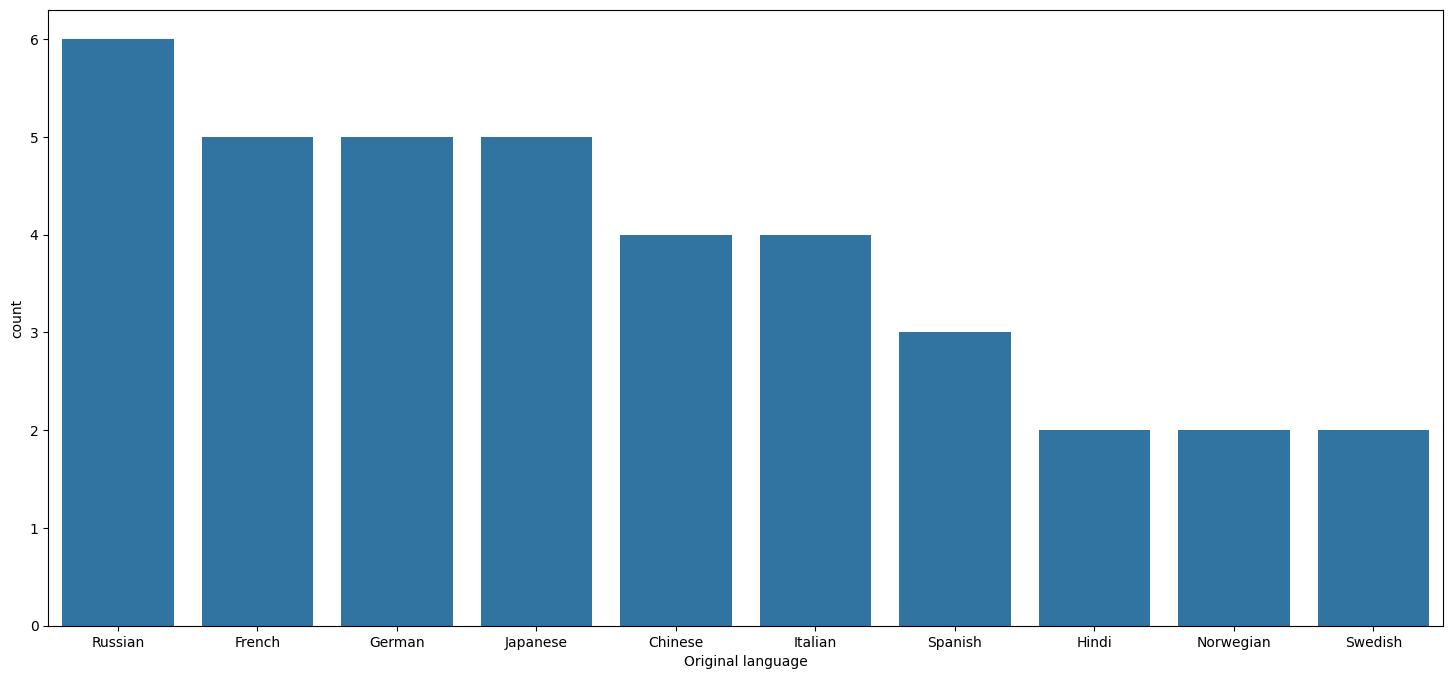

In [ ]:
#Becasue English is so overrepresented, I removed English to get a better sense of the spread of language

top_languages = df[df['Original language'] != 'English']['Original language'].value_counts().head(10)
top_languages = top_languages.sort_values(ascending=False)

plt.figure(figsize=(18, 8))
sns.countplot(data=df[df['Original language'].isin(top_languages.index)], x='Original language', order=top_languages.index)
plt.xticks(rotation=0)
plt.show()

In [ ]:
import plotly.express as px

# Replace NaN values with 'Unknown' in 'Genre' and 'Author(s)' columns
df['Genre'] = df['Genre'].fillna('Unknown')
df['Author(s)'] = df['Author(s)'].fillna('Unknown')

# Add 'Unknown' to the categories of the categorical columns and fill NaN
for col in ['Original language', 'Genre']:
    if pd.api.types.is_categorical_dtype(df[col]):
        df[col] = df[col].cat.add_categories(['Unknown'])
        # Fill NaN values for this specific column
        df[col] = df[col].fillna('Unknown')

# Create the sunburst plot
fig = px.sunburst(
    df,
    path=['Original language', 'Genre', 'Author(s)'],
    values='Approximate sales in millions',
    color='Approximate sales in millions',
    height=1200,
    width=1200
)

fig.update_layout(title_pad_l=330)
fig.show()

<ipython-input-43-eede940feeed>:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):


# Findings


1. The most popular genre is the Novel (41.2%), followed by Children's Literature (15.5%), Self-Help (9.5%), and Fantasy (8.1%)
2. Young Adult fiction has taken over Children's Literature as the second most lucrative genre in the 21st century.
3. The most popular language is English by a large margin (78.4%), followed by Russian (3.6%)
4. The vast majority of books (65%) are found in the first bin, between 9.81 and 29.0 million with a count of 113.
5. The most lucrative year for bestsellers was 1988, followed closely by 1979
6. The mean sales figures is 30.1 million
7. The standard deviaition of sales is 27.95, which is influenced by extreme outliers, such as The Little Prince and A Tale of Two Cities
8. J.K. Rowling has the most sales as a single author, followed by Suzanne Collins, Roald Dahl, and Dan Brown
9. Only 6 books have over 100 million in sales, and two out of those six are considered Fantasy
10. Only 2 books have over 200 million in sales: A Tale of Two Cities and the Little Prince
11. The newest genre to make it to the bestseller list is Young adult romantic novel
12. Only 1 book in this dataset was written before 1700, which is Dante's The Divine Comedy
13. The majority of bestsellers were published between 1900 and 2000, with 1300 being a dramatic outlier

# Assertions to Test

1. 11 books with over 100 million in sales may be skewing the data
2. Fantasy may be overrepresented due to the popularity of Rowling's Harry Potter series and The Hobbit

In [ ]:
df2 = df.drop(df[df['Author(s)'] == 'J.K. Rowling'].index)

In [ ]:
df2 = df.drop(df[df['Book'].str.contains('Potter')].index)

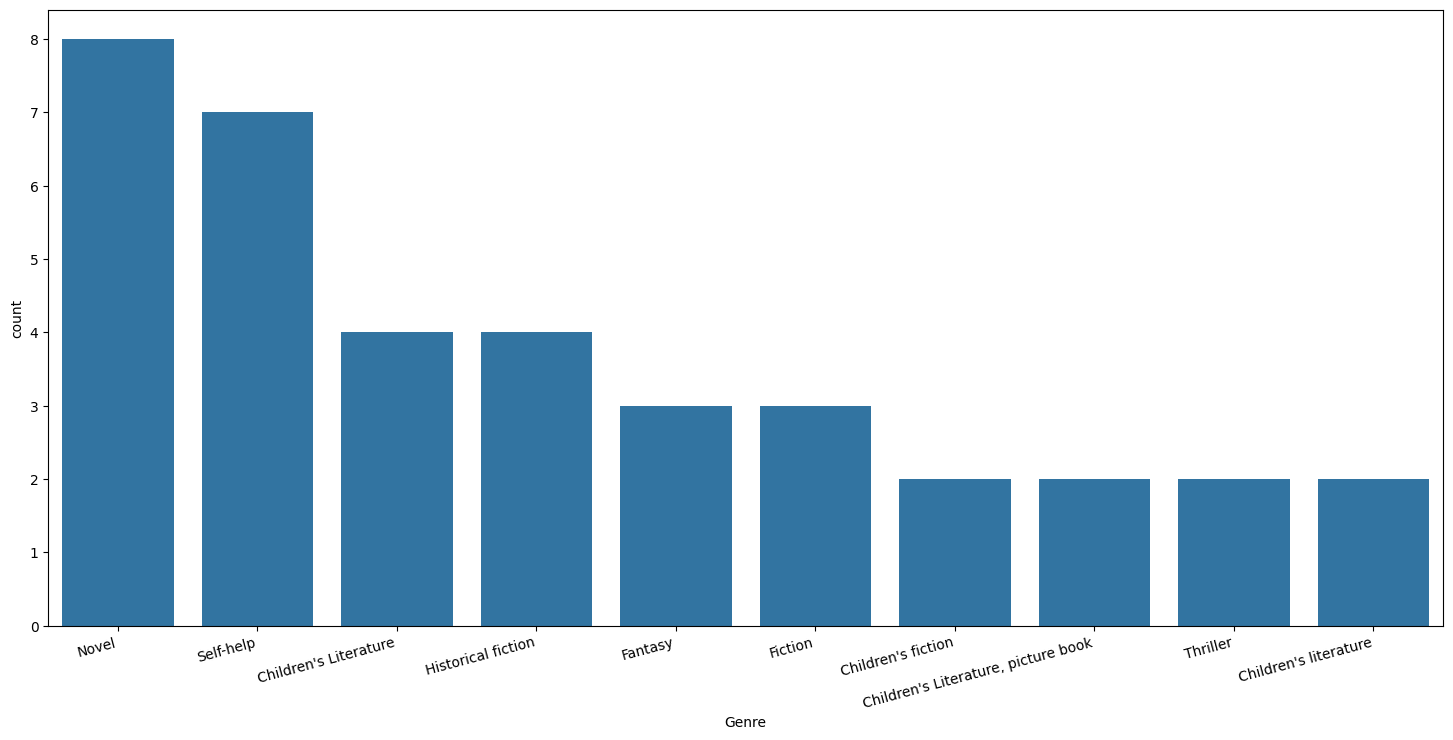

In [ ]:
#After removing Harry Potter and the Novel, what is the most represented genre in terms of bestsellers?

# Filter out 'Unknown' before calculating top genres
filtered_df2 = df2[df2['Genre'] != 'Unknown']

# Get the top 10 genres
top_genres = filtered_df2['Genre'].value_counts().head(10)
top_genres = top_genres.sort_values(ascending=False)

# Plot
plt.figure(figsize=(18, 8))
sns.countplot(data=filtered_df2[filtered_df2['Genre'].isin(top_genres.index)], x='Genre', order=top_genres.index)
plt.xticks(rotation=15, ha='right')
plt.show()


In [ ]:
#let's remove authors with over 100 million sales from the dataset to see if Fantasy remains the best represented genre amongst bestsellers

df3 = df.drop(df[df['Author(s)'] == 'J.K. Rowling'].index)
df3 = df.drop(df[df['Author(s)'] == 'Charles Dickens'].index)
df3 = df.drop(df[df['Author(s)'] == 'Antoine de Saint-Exupéry'].index)
df3 = df.drop(df[df['Author(s)'] == 'Agatha Christie'].index)
df3 = df.drop(df[df['Author(s)'] == 'Cao Xueqin'].index)
df3 = df.drop(df[df['Author(s)'] == 'J. R. R. Tolkien'].index)

In [ ]:
df3 = df.drop(df[df['Book'].str.contains('Potter')].index)
df3 = df.drop(df[df['Book'] == 'A Tale of Two Cities'].index)
df3 = df.drop(df[df['Book'] == 'The Hobbt'].index)
df3 = df.drop(df[df['Book'] == 'Dream of the Red Chamber (紅樓夢)'].index)
df3 = df.drop(df[df['Book'] == 'The Little Prince (Le Petit Prince)'].index)
df3 = df.drop(df[df['Book'] == 'And Then There Were'].index)

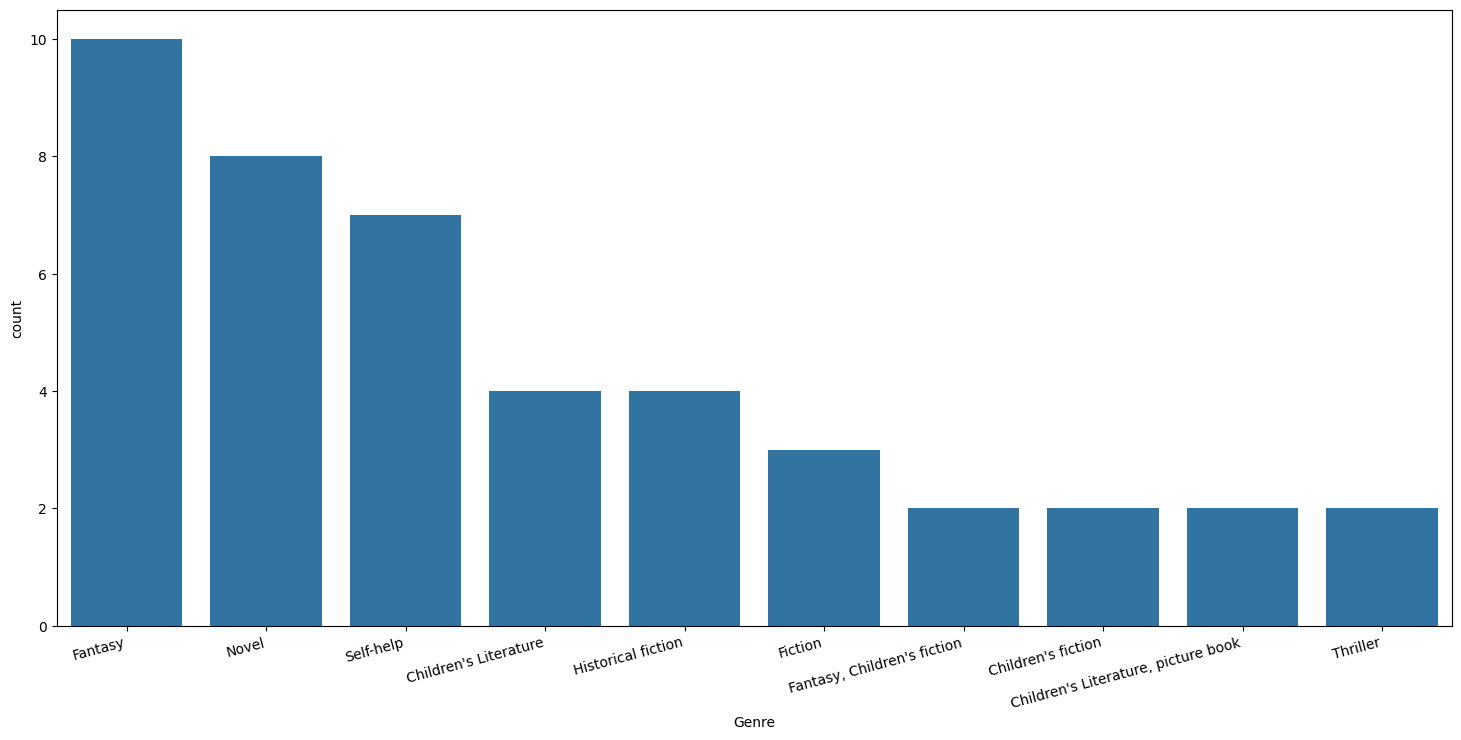

In [ ]:
#after removing Harry Potter, what is the most represented genre in terms of bestsellers?

# Get the top 10 genres, excluding "Unknown"
top_genres = df3[df3['Genre'] != 'Unknown']['Genre'].value_counts().head(10)
top_genres = top_genres.sort_values(ascending=False)

# Plot
plt.figure(figsize=(18, 8))
sns.countplot(data=df3[df3['Genre'].isin(top_genres.index) & (df3['Genre'] != 'Unknown')], x='Genre', order=top_genres.index)
plt.xticks(rotation=15, ha='right')
plt.show()


Conclusion: Even after removing J.K. Rowling and authors with over 100 million in sales, Fantasy remains the most lucrative genre, which makes sense, given that the novel is perhaps the most broad genre. With that being said, the growing popularity of Young Adult and Fantasy, it would be smart to promote these genres.